# Capstone - Reinforcement Learning

## Goal
* Implement OOP Techniques
* Build ML model from scratch - Reinforcement Learning
* Teach it to pickup and deliver items

## What is Reinforcement Learning?
* Reinforcement Learning teaches the machine to think for itself based on past action rewards.
* Basically, the Reinforcement Learning Algorithms tries to predict actions that gives rewards and avoid punishment.
* It is like training a dog. You and the dog don't talk the same language, but the dog learns how to act based on rewards (and punishment).
* Hence, if a dog is rewarded for a certain action in a give situation, then next time it is exposed to a similar situation it will act the same.
* Translate that to Reinforcement Learning.
    * The **agent** is the dog that is exposed to the **environment**
    * Then the **agent** encounters a **state**
    * The **agent** performs an **action** to transition to a **new state.**
    * Then after the transition the **agent** receives a **reward** or **penalty (punishment).**
    * This forms a **policy** to create a strategy to choose actions in a given **state.**
    
## What algorithms are used for Reinforcement Learning?
* The most common algorithm for Reinforcement Learning are:
    * **Q-Learning:** is a model-free reinforcement learning algorithm to learn a policy telling an agent what action to take under what circumstances.
    * **Temporal Difference:** refers to a class of model-free reinforcement learning methods which learn by bootstrapping from the current estimate of the value function.
    * **Depp Adversarial Network:** is a technique employed in the field of machine learning which attempts to fool models through malicious input.
* We will focus on the **Q-Learning** algorithm as it easy to understand as well as powerfull.

***exploiting** fokus pada memanfaatkan sumber daya yang sudah ada dengan cara yang paling efektif, sedangkan **exploring** fokus pada mencari alternatif baru dan mengembangkan ide-ide baru untuk mencapai tujuan yang diinginkan.*

## How does the Q-learning algorithm work?
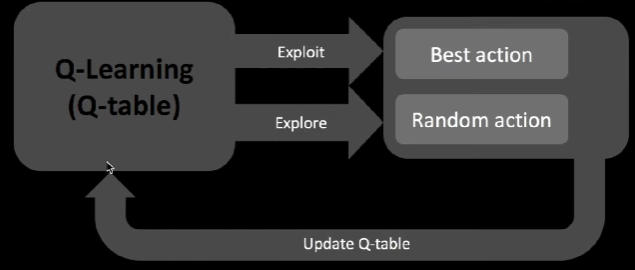
* The Q-learning algorithm has a Q-table (a Matrix of dimension state x actions - matrix is just an indexed "container" with numbers).
* The agent (or Q-Learning algorithm) will be in a state.
* Then in each iteration the agent needs take an action.
* The agent will continuosly update the reward in the Q-table.
* The learning can come from either exploiting or exploring.
* This translates into the following pseudo algorithm for the Q-Learning.
* The agent is in a given state and needs to choose an action.

### Algorithm
* Initialize the **Q-table** to all zeros
* Iterate
    * Agent is in state **state**
    * With probability **epsilon** choose to **explore**, else **exploit.**
        * If **explore**, then choose a random **action**
        * If **exploit**, then choose the best **action** based on the current **Q-table.**
    * Update the **Q-table** from the new **reward** to the previous state.
    * **Q[state, action] = (1-alpha) * Q[state, action] + alpha * (reward + gamma * max(Q[new_state]) - Q[state,action])**
    
### Variables
As you can see, we have introduced the following variables.
* **epsilon:** the probability to take a random action, which is done to explore new territory.
* **alpha:** is the learning rate that the algorithm should make in each iteration and should be in the interval from 0 to 1.
* **gamma:** is the discount factor used to balance the immediate and futur reward. This value is usually between 0.8 and 0.99
* **reward:** is the feedback on the action and can be any number. Negative is penalty (or punishment) and positive is a reward.

## Description of task to solve
* To keep it simple, we create a field of size 10x10 positions. In that field there is an item that needs to be picked up and moved to a drop-off point.<br>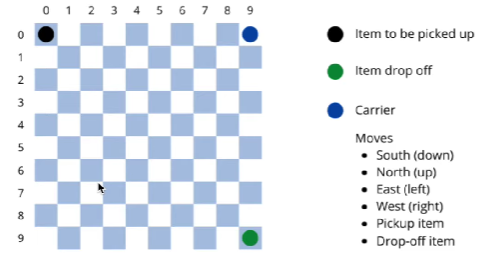
* At each position there are 6 different actions that can be taken.
    * **Action 0:** Go south if on field.
    * **Action 1:** Go north if on field.
    * **Action 2:** Go east if on field.
    * **Action 3:** Go west if on field.
    * **Action 4:** Pickup item (it can try even if it is not there).
    * **Action 5:** Drop-off item (it can try even if it does not have it).
* Based on these actions, we will make a reward system:
    * If the agent tries to go off the field, punish with -10 in reward.
    * If the agent makes a (legal) move, punish with -1 in reward, as we don't want to encourage endless walking around.
    * If the agent tries to pick up item, but it is not there or it has it already, punish with -10.
    * If agent tries to drop-off item in wrong place or does not have the item, punish with -10.
    * If the agent drops-off item in correct place, reward with 20.
* That translates into the following code. 

In [1]:
class Field:
    def __init__(self, size, item_pickup, item_drop_off, start_position):
        self.size = size
        self.item_pickup = item_pickup
        self.item_drop_off = item_drop_off
        self.position = start_position
        self.item_in_car = False
        
    def get_number_of_states(self):
        return self.size * self.size * self.size * self.size * 2 # size of Q table
    
    def get_state(self):
        state = self.position[0] * self.size * self.size * self.size * 2
        state = state + self.position[1] * self.size * self.size * 2
        state = state + self.item_pickup[0] * self.size * 2
        state = state + self.item_pickup[1] * 2
        if self.item_in_car:
            state = state + 1
        return state
        
    def make_action(self, action):
        (x,y) = self.position
        if action == 0: # Go South
            if y == self.size - 1:
                return -10, False
            else:
                self.position = (x, y + 1)
                return -1, False
        elif action == 1: # Go North
            if y == 0:
                return -10, False
            else:
                self.position = (x, y - 1)
                return -1, False
        elif action == 2: # Go East
            if x == 0:
                return -10, False
            else:
                self.position = (x - 1, y)
                return -1, False
        elif action == 3: # Go West
            if x == self.size - 1:
                return -10, False
            else:
                self.position = (x + 1, y)
                return -1, False
        elif action == 4: # Pickup item
            if self.item_in_car:
                return -10, False
            elif self.item_pickup != (x, y):
                return -10, False
            else:
                self.item_in_car = True
                return 20, False
        elif action == 5: # Drop off item
            if not self.item_in_car:
                return -10, False
            elif self.item_drop_off != (x, y):
                self.item_pickup = (x, y)
                self.item_in_car = False
                return -10, False
            else:
                return 20, True

In [2]:
field = Field(10, (0, 0), (9,9), (9,0))

field.make_action(2)
field.make_action(2)
field.make_action(2)
field.make_action(2)
field.make_action(2)
field.make_action(2)
field.make_action(2)
field.make_action(2)
field.make_action(2)

field.position

(0, 0)

In [3]:
field.make_action(4)

field.make_action(0)
field.make_action(3)
field.make_action(0)
field.make_action(3)
field.make_action(0)
field.make_action(3)
field.make_action(0)
field.make_action(3)
field.make_action(0)
field.make_action(3)
field.make_action(0)
field.make_action(3)
field.make_action(0)
field.make_action(3)
field.make_action(0)
field.make_action(3)
field.make_action(0)
field.make_action(3)

field.position

(9, 9)

In [4]:
import random

In [32]:
def naive_solution():
    size = 10
    item_start = (0,0)
    item_drop_off = (9,9)
    start_position = (9,0)
    
    field = Field(size, item_start, item_drop_off, start_position)
    done = False
    steps = 0
    
    while not done:
        action = random.randint(0, 5)
        reward, done = field.make_action(action)
        steps += 1
        
    return steps

In [33]:
naive_solution()

35493

In [34]:
runs = [naive_solution() for _ in range(100)]

In [35]:
sum(runs) / len(runs)

143453.64

### Algorithm
* Initialize the **Q-table** to all zeros
* Iterate
    * Agent is in state **state**
    * With probability **epsilon** choose to **explore**, else **exploit.**
        * If **explore**, then choose a random **action**
        * If **exploit**, then choose the best **action** based on the current **Q-table.**
    * Update the **Q-table** from the new **reward** to the previous state.
    * **Q[state, action] = (1-alpha) * Q[state, action] + alpha * (reward + gamma * max(Q[new_state]) - Q[state,action])**

In [9]:
import numpy as np

In [26]:
size = 10
item_start = (0,0)
item_drop_off = (9,9)
start_position = (9,0)

field = Field(size, item_start, item_drop_off, start_position)
done = False

number_of_states = field.get_number_of_states()
number_of_actions = 6

q_table = np.zeros((number_of_states, number_of_actions))

epsilon = 0.1
alpha = 0.1
gamma = 0.6

for _ in range(10000):
    field = Field(size, item_start, item_drop_off, start_position)
    done = False
    
    while not done:
        state = field.get_state()
        if random.uniform(0, 1) < epsilon:
            action = random.randint(0,5)
        else:
            action = np.argmax(q_table[state]) 
        
        reward, done = field.make_action(action)
        
        #Q[state, action] = (1-alpha) * Q[state, action] + alpha * (reward + gamma * max(Q[new_state]) - Q[state,action])
        
        new_state = field.get_state()
        new_state_max = np.max(q_table[new_state])
        
        q_table[state, action] = (1 - alpha) * q_table[state, action] + alpha * (reward + gamma * new_state_max - q_table[state, action])
        

In [27]:
q_table

array([[ 0.23071429, -2.06428571, -2.06428571,  0.23071429,  9.78571429,
        -2.06428571],
       [-0.71428571, -5.21428571, -5.21428571, -0.71428571, -5.21428571,
        -2.06428571],
       [ 1.93172443, -1.8       , -1.        , -0.1       , -1.        ,
        -0.90111185],
       ...,
       [-1.        ,  0.0182999 , -0.1       , -0.89714389, -0.94285946,
        14.28571387],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])

In [28]:
def reinforcement_learning():
    epsilon = 0.1
    alpha = 0.1
    gamma = 0.6
    
    field = Field(size, item_start, item_drop_off, start_position)
    done = False
    steps = 0
    
    while not done:
        state = field.get_state()
        if random.uniform(0, 1) < epsilon:
            action = random.randint(0,5)
        else:
            action = np.argmax(q_table[state]) 
        
        reward, done = field.make_action(action)
        
        #Q[state, action] = (1-alpha) * Q[state, action] + alpha * (reward + gamma * max(Q[new_state]) - Q[state,action])
        
        new_state = field.get_state()
        new_state_max = np.max(q_table[new_state])
        
        q_table[state, action] = (1 - alpha) * q_table[state, action] + alpha * (reward + gamma * new_state_max - q_table[state, action])
        
        steps = steps + 1
        
    return steps

In [29]:
reinforcement_learning()

39

In [30]:
runs_rl = [reinforcement_learning() for _ in range(100)]

In [31]:
sum(runs_rl) / len(runs_rl)

56.85